<a href="https://colab.research.google.com/github/KhaledZakarie/HandWritten-Grauation-Project/blob/main/Ditict_R26_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**##Imports##**

In [66]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

**##Read Image &  Resize##**

(677, 749, 3)
(677, 749, 3)


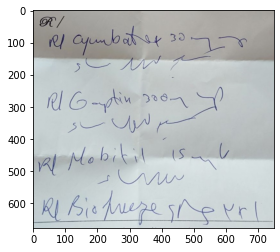

In [67]:
img = cv2.imread('/content/Cairo-500.jpg') #read image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #imageFile is read with imread(), the order of colors is BGR, On the other hand, in Pillow, the order of colors is GB 

h, w, c = img.shape #height, width, channels 
print(img.shape)
if w > 1000: # width must longer than 1000
    new_w = 1000
    ar = w/h #to get the new height
    new_h = int(new_w/ar)
    
    img = cv2.resize(img, (new_w, new_h), interpolation = cv2.INTER_AREA)
print(img.shape)
plt.imshow(img);

**##Threshold Function##**

In [68]:
def thresholding(image):
    img_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    #ret,thresh = cv2.threshold(img_gray, 120,255,cv2.THRESH_BINARY_INV)
    thresh = cv2.adaptiveThreshold(img_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
    plt.imshow(thresh, cmap='gray')
    return thresh

**##Calling Threashold##**

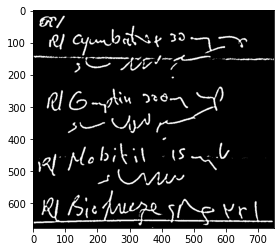

In [69]:
blurred = cv2.GaussianBlur(img.copy(), (17, 17), 0)
thresh_img = thresholding(blurred);

**##Line dilation##**

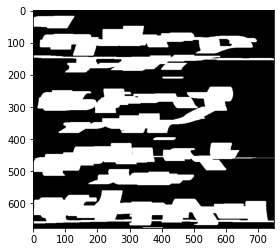

In [70]:
kernel = np.ones((1,60), np.uint8) #matrix of ones on shape 3*85 in dataType unsigned int 
#print(kernel)
dilated = cv2.dilate(thresh_img, kernel, iterations = 1) #iteration is num of steps of kernal
plt.imshow(dilated, cmap='gray');

**##Get Contours##**

In [71]:
(contours, heirarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
sorted_contours_lines_N = sorted(contours, key = lambda ctr : cv2.boundingRect(ctr)[1]) # (x, y, w, h) #1 mean sort vertically but 0 mean sort horizontally
print(sorted_contours_lines_N[0].shape)

(298, 1, 2)


**##Contours to (x, y, w, h)##**

In [72]:
sorted_contours_lines = []
for ctr in sorted_contours_lines_N:
  x,y,w,h = cv2.boundingRect(ctr)
  sorted_contours_lines.append((x,y,w,h))

**##Mean Hight Of Lines##**

In [73]:
def mean_hight_of_lines(sorted_contours_lines):
  sum_of_heights = 0
  for ctr in sorted_contours_lines:
      x,y,w,h = ctr  
      sum_of_heights += h 
  mean_of_heights = sum_of_heights/len(sorted_contours_lines)
  return mean_of_heights

**##Mean Space Between Lines##**

In [74]:
def mean_space_between_lines(sorted_contours_lines):
  sum_of_spaces = 0
  i=1
  for ctr in sorted_contours_lines:
    if(i < len(sorted_contours_lines)):
      x,y,w,h = ctr
      nx,ny,nw,nh = sorted_contours_lines[i]
      #sum_of_spaces += (y-(ny+nh))
      sum_of_spaces += (ny - (y+h))
      i +=1
  mean_of_spaces = sum_of_spaces / (len(sorted_contours_lines)-1)
  return mean_of_spaces

# **##First Calling Of Mean Hight & Mean Space**(Before Delete Noise)**##**

In [75]:
mean_of_heights = mean_hight_of_lines(sorted_contours_lines)
mean_of_spaces = mean_space_between_lines(sorted_contours_lines)

**##h = Mean_h##**

0
21
0
14
0
172
0


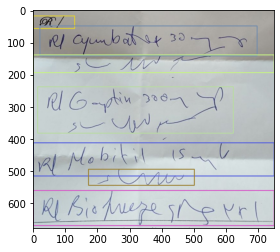

In [76]:
img4 = img.copy()
sorted_contours_lines_mean = []
for ctr in sorted_contours_lines:
    #ctr= sorted_contours_lines[4]
    x,y,w,h = ctr
    if(h < int(mean_of_heights/2)):
        continue
    #if(h > int(2 * mean_of_heights)):
     #   h=int(mean_of_heights)
      #  ny= (y+h) + int(mean_of_spaces)
        #print(f"y {y} h {y+h} ny {ny}")
       # cv2.rectangle(img4, (x,ny), (x+w, ny+h), (np.random.randint(255),np.random.randint(255),np.random.randint(255)), 2) #img, coordnate, area, color, bold
        #sorted_contours_lines_mean.append((x,ny,w,h))
    print(x)
    cv2.rectangle(img4, (x,y), (x+w, y+h), (np.random.randint(255),np.random.randint(255),np.random.randint(255)), 2) #img, coordnate, area, color, bold
    sorted_contours_lines_mean.append((x,y,w,h))
    #print(f"h {h} mean {mean_of_spaces}")
plt.imshow(img4);

# **##Second Calling Of Mean Hight & Mean Space**(After Delete Noise)**##**

In [77]:
mean_of_heights = mean_hight_of_lines(sorted_contours_lines_mean)
mean_of_spaces = mean_space_between_lines(sorted_contours_lines_mean)

**##Print Line##**

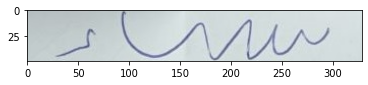

In [78]:
img3 = img.copy()  
#x,y,w,h = cv2.boundingRect(sorted_contours_lines[1])
LineNum=5
x, y, w, h = sorted_contours_lines_mean[LineNum]
#x=sorted_contours_lines_norm[LineNum][0]
#y=sorted_contours_lines_norm[LineNum][1]
#w=sorted_contours_lines_norm[LineNum][2]
#h=sorted_contours_lines_norm[LineNum][3]
plt.imshow(img3[y:y+h, x:x+w])

**##Crop Lines##**

In [61]:
crop_img = img.copy()
i=0
os.mkdir('/content/Lines')
for ctr in sorted_contours_lines_mean:
    #x=ctr[0]
    #=ctr[1]
    #w=ctr[2]
    #h=ctr[3]
    x,y,w,h = ctr
    #x,y,w,h = cv2.boundingRect(ctr)
    line = crop_img[y:h+y, x:w+x]
    print(str(x) + " " + str(y) +" "+str(w) +" "+str(h))
    cv2.imwrite(f"/content/Lines/Line_{i}.jpg", line)
    i+=1


FileExistsError: ignored

**##Create Lines.zip##**

In [ ]:
!zip -r /content/Lines.zip /content/Lines/ #path+name  #path⅖

  adding: content/Lines/ (stored 0%)
  adding: content/Lines/Line_4.jpg (deflated 1%)
  adding: content/Lines/Line_5.jpg (deflated 24%)
  adding: content/Lines/Line_9.jpg (deflated 26%)
  adding: content/Lines/Line_8.jpg (deflated 1%)
  adding: content/Lines/Line_1.jpg (deflated 1%)
  adding: content/Lines/Line_0.jpg (deflated 6%)
  adding: content/Lines/Line_2.jpg (deflated 2%)
  adding: content/Lines/Line_3.jpg (deflated 27%)
  adding: content/Lines/Line_7.jpg (deflated 3%)
  adding: content/Lines/Line_6.jpg (deflated 1%)


**##Word dilation##**

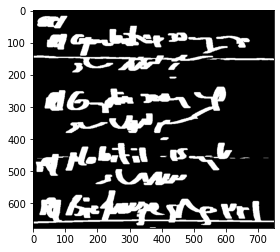

In [79]:
kernel = np.ones((1,16), np.uint8)
dilated2 = cv2.dilate(thresh_img, kernel, iterations = 1)
plt.imshow(dilated2, cmap='gray');

**##Space between words##**

In [80]:
def spaceBetweenWords(word1, word2):
  x, y, w, h = cv2.boundingRect(word1)
  x2, y2, w2, h2 = cv2.boundingRect(word2)
  space=x2-(w+x)
  print(f"x1 {x} x2 {x2}")
  return space


**##Word Segmentation##**

x1 22 x2 95
x1 0 x2 122
x1 22 x2 87
x1 9 x2 101
x1 22 x2 84
x1 0 x2 101


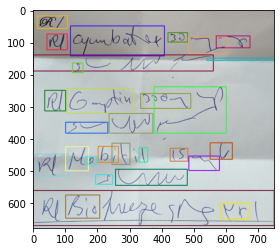

In [81]:
img3 = img.copy()
words_list = []
ln=0
FistWordList = []
FR=0
for line in sorted_contours_lines_mean:
    sorted_contour_words = []
    if line[0] > 250 :#line[0]=x #if exist more than word in exact line  لو الاكس كبيره يبقي السطر بادئ مش من اول السطر فمش عايزه
      continue
    FirstWordInLine=0
    #line = sorted_contours_lines_mean[1]
    # roi of each line
    #x, y, w, h = cv2.boundingRect(line)
    #x=line[0]
    #y=line[1]
    #w=line[2]
    #h=line[3]
    x, y, w, h = line
    
    roi_line = dilated2[y:h+y, x:w+x]
    #plt.imshow(roi_line);
    # draw contours on each word
    (cnt, heirarchy) = cv2.findContours(roi_line.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    sorted_contour_words_beforeFilter = sorted(cnt, key=lambda cntr : cv2.boundingRect(cntr)[0])#0 mean sort horizontally but 1 mean sort vertically  
    
    for word in sorted_contour_words_beforeFilter:
        if cv2.contourArea(word) < 400:
            continue
        sorted_contour_words.append(word)

    for word in sorted_contour_words:
        #print(cv2.contourArea(word))
        #print(len(sorted_contour_words))
        # if cv2.contourArea(word) < 400:
        #     continue
        if FR==0 :
          firstR = word
          FR=1
        if (ln >= 0) and (FirstWordInLine == 0) and len(sorted_contour_words)>1:
            spaceBetweenWord=spaceBetweenWords(sorted_contour_words[0], sorted_contour_words[1])
            FistWordList.append(((x, y), word, spaceBetweenWord))
            FirstWordInLine = 1
            

        x2, y2, w2, h2 = cv2.boundingRect(word)
        words_list.append([x+x2, y+y2, x+x2+w2, y+y2+h2])
        cv2.rectangle(img3, (x+x2, y+y2), (x+x2+w2, y+y2+h2), (np.random.randint(255),np.random.randint(255),np.random.randint(255)),2)
    ln+=1

plt.imshow(img3);

2226.0
7376.5
3019.5
2848.5
619.5
23705.0


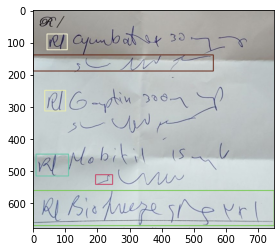

In [88]:
img4 = img.copy()
SameAreaList = []
AreaR1 = cv2.contourArea(FistWordList[0][1]) #FistWordList[num of word][contours of word]##contour of first word in list

if(AreaR1 < (cv2.contourArea(firstR)*2)) :
  for word in FistWordList:
    ##word -> word[0]= contours of line, word[1]=contour of word in the line, word[2]= space between first & second
    print(cv2.contourArea(word[1])) #word[1]=contour of word
    #print(word[2])
    if (cv2.contourArea(word[1]) < (AreaR1+(AreaR1*1.5))  ):
      SameAreaList.append(word)
  
    x2, y2, w2, h2 = cv2.boundingRect(word[1])
    #word is (x, y), word----->(x, y) of line of word ,,, word is contour of words 
    #word[1] = contour of word
    #word[0][0] = x of line,,,,word[0][1] = y of line
    cv2.rectangle(img4, (word[0][0]+x2, word[0][1]+y2), (word[0][0]+x2+w2, word[0][1]+y2+h2), (np.random.randint(255),np.random.randint(255),np.random.randint(255)),2)
plt.imshow(img4);

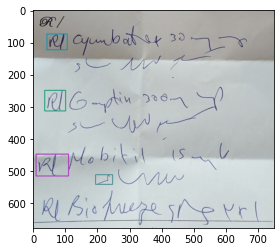

In [89]:
img5 = img.copy()
for word in SameAreaList:
  x2, y2, w2, h2 = cv2.boundingRect(word[1])
  #word is (x, y), word----->(x, y) of line of word ,,, word is contour of words 
  #word[1] = contour of word
  #word[0][0] = x of line,,,,word[0][1] = y of line
  cv2.rectangle(img5, (word[0][0]+x2, word[0][1]+y2), (word[0][0]+x2+w2, word[0][1]+y2+h2), (np.random.randint(255),np.random.randint(255),np.random.randint(255)),2)
plt.imshow(img5);

**##Print Word##**

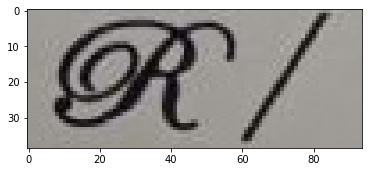

In [90]:
word = words_list[0]
word_img = img[word[1]:word[3], word[0]:word[2]]
plt.imshow(word_img);

**##Crop Words##**

In [ ]:
crop_img = img.copy()
i=0
os.mkdir('/content/Words')
for ctr in words_list:
    
    #x,y,w,h = cv2.boundingRect(ctr)
    x=ctr[0]
    y=ctr[1]
    w=ctr[2]
    h=ctr[3]
    word = crop_img[y:h, x:w]
    print(str(x) + " " + str(y) +" "+str(w) +" "+str(h))
    cv2.imwrite(f"/content/Words/Word_{i}.jpg", word)
    i+=1


**##Create Words.zip##**

In [ ]:
!zip -r /content/Words.zip /content/Words/ #path+name  #path⅖

  adding: content/Words/ (stored 0%)
  adding: content/Words/Word_32.jpg (deflated 5%)
  adding: content/Words/Word_52.jpg (deflated 9%)
  adding: content/Words/Word_0.jpg (deflated 24%)
  adding: content/Words/Word_10.jpg (deflated 2%)
  adding: content/Words/Word_26.jpg (deflated 2%)
  adding: content/Words/Word_44.jpg (deflated 3%)
  adding: content/Words/Word_11.jpg (deflated 15%)
  adding: content/Words/Word_50.jpg (deflated 4%)
  adding: content/Words/Word_24.jpg (deflated 7%)
  adding: content/Words/Word_12.jpg (deflated 5%)
  adding: content/Words/Word_22.jpg (deflated 17%)
  adding: content/Words/Word_47.jpg (deflated 3%)
  adding: content/Words/Word_19.jpg (deflated 21%)
  adding: content/Words/Word_59.jpg (deflated 1%)
  adding: content/Words/Word_9.jpg (deflated 3%)
  adding: content/Words/Word_37.jpg (deflated 2%)
  adding: content/Words/Word_35.jpg (deflated 9%)
  adding: content/Words/Word_46.jpg (deflated 7%)
  adding: content/Words/Word_69.jpg (deflated 15%)
  adding: 